In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('House Price Prediction Dataset.csv')

In [3]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


# 🎯 What Is Feature Engineering?

**Feature Engineering** is the art and science of:

> ✨ Creating new, more meaningful input features from your existing data to help the model learn better.

---

## ✅ Why Is It Important?

* Better features often matter **more than the model** itself
* Makes patterns more **explicit**
* Helps the model understand **domain-specific relationships**
* Boosts accuracy and generalization

---

## 🔍 Types of Feature Engineering (with examples for your dataset)

| Type                | What it does                 | Example                                          |
| ------------------- | ---------------------------- | ------------------------------------------------ |
| 🔁 Transformation   | Change scale or distribution | `Log(Price)` — done                              |
| ➗ Ratio/Interaction | Combines features            | `Area / Bedrooms` — done                         |
| ➕ Aggregation       | Adds up info                 | `Total Rooms = Bedrooms + Bathrooms`             |
| 🧮 Binning          | Converts numeric to category | `Old/Medium/New house` from `YearBuilt`          |
| 🗂️ Encoding        | Converts category to numbers | One-hot encoding — done                          |
| ❓ Boolean Flags     | Adds Yes/No flags            | `Is_Luxury = Price > 500000`                     |
| 📆 Date Features    | Extracts from date           | If you had dates: extract `Year`, `Month`, `Day` |

In [7]:
df['LogPrice'] = np.log(df['Price'])

In [8]:
df['Area_per_Bedroom'] = df['Area'] / df['Bedrooms']
df['Bathroom_per_Floor'] = df['Bathrooms'] / df['Floors']

In [9]:
df.head(3)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,LogPrice,Area_per_Bedroom,Bathroom_per_Floor
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,11.917850,272.0,1.333333
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,12.959840,854.4,1.333333
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,12.494052,1796.0,0.666667


In [10]:
df['TotalRooms'] = df['Bedrooms'] + df['Bathrooms']

In [11]:
df['HouseAge'] = 2025 - df['YearBuilt']

In [12]:
df['AgeCategory'] = pd.cut(df['HouseAge'], bins=[0, 20, 50, 100, 200], labels=['New', 'Modern', 'Old', 'Historic'])

In [13]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,LogPrice,Area_per_Bedroom,Bathroom_per_Floor,TotalRooms,HouseAge,AgeCategory
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,11.917850,272.0,1.333333,9,55,Old
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,12.959840,854.4,1.333333,9,67,Old
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,12.494052,1796.0,0.666667,4,87,Old
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,12.405005,241.5,1.000000,6,123,Historic
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,13.363042,4926.0,2.000000,5,50,Modern


In [14]:
df = pd.get_dummies(df, columns=['AgeCategory'], drop_first=True)

In [16]:
df = pd.get_dummies(df, columns=['Location', 'Condition'], drop_first=True)

In [18]:
print(df.dtypes)

Id                        int64
Area                      int64
Bedrooms                  int64
Bathrooms                 int64
Floors                    int64
YearBuilt                 int64
Garage                   object
Price                     int64
LogPrice                float64
Area_per_Bedroom        float64
Bathroom_per_Floor      float64
TotalRooms                int64
HouseAge                  int64
AgeCategory_Modern         bool
AgeCategory_Old            bool
AgeCategory_Historic       bool
Location_Rural             bool
Location_Suburban          bool
Location_Urban             bool
Condition_Fair             bool
Condition_Good             bool
Condition_Poor             bool
dtype: object


In [19]:
 # Convert All Boolean Columns to Integers 
bool_cols = df.select_dtypes(include='bool').columns
bool_cols

Index(['AgeCategory_Modern', 'AgeCategory_Old', 'AgeCategory_Historic',
       'Location_Rural', 'Location_Suburban', 'Location_Urban',
       'Condition_Fair', 'Condition_Good', 'Condition_Poor'],
      dtype='object')

In [20]:
df[bool_cols] = df[bool_cols].astype(int)

In [21]:
df.dtypes

Id                        int64
Area                      int64
Bedrooms                  int64
Bathrooms                 int64
Floors                    int64
YearBuilt                 int64
Garage                   object
Price                     int64
LogPrice                float64
Area_per_Bedroom        float64
Bathroom_per_Floor      float64
TotalRooms                int64
HouseAge                  int64
AgeCategory_Modern        int32
AgeCategory_Old           int32
AgeCategory_Historic      int32
Location_Rural            int32
Location_Suburban         int32
Location_Urban            int32
Condition_Fair            int32
Condition_Good            int32
Condition_Poor            int32
dtype: object

In [22]:
# Convert Garage from 'Yes' / 'No' to 1 / 0
df['Garage'] = df['Garage'].map({'Yes' : 1, 'No' : 0})

In [25]:
df.dtypes

Id                        int64
Area                      int64
Bedrooms                  int64
Bathrooms                 int64
Floors                    int64
YearBuilt                 int64
Garage                    int64
Price                     int64
LogPrice                float64
Area_per_Bedroom        float64
Bathroom_per_Floor      float64
TotalRooms                int64
HouseAge                  int64
AgeCategory_Modern        int32
AgeCategory_Old           int32
AgeCategory_Historic      int32
Location_Rural            int32
Location_Suburban         int32
Location_Urban            int32
Condition_Fair            int32
Condition_Good            int32
Condition_Poor            int32
dtype: object

 # Outlier Detection

# Visualize Outliers

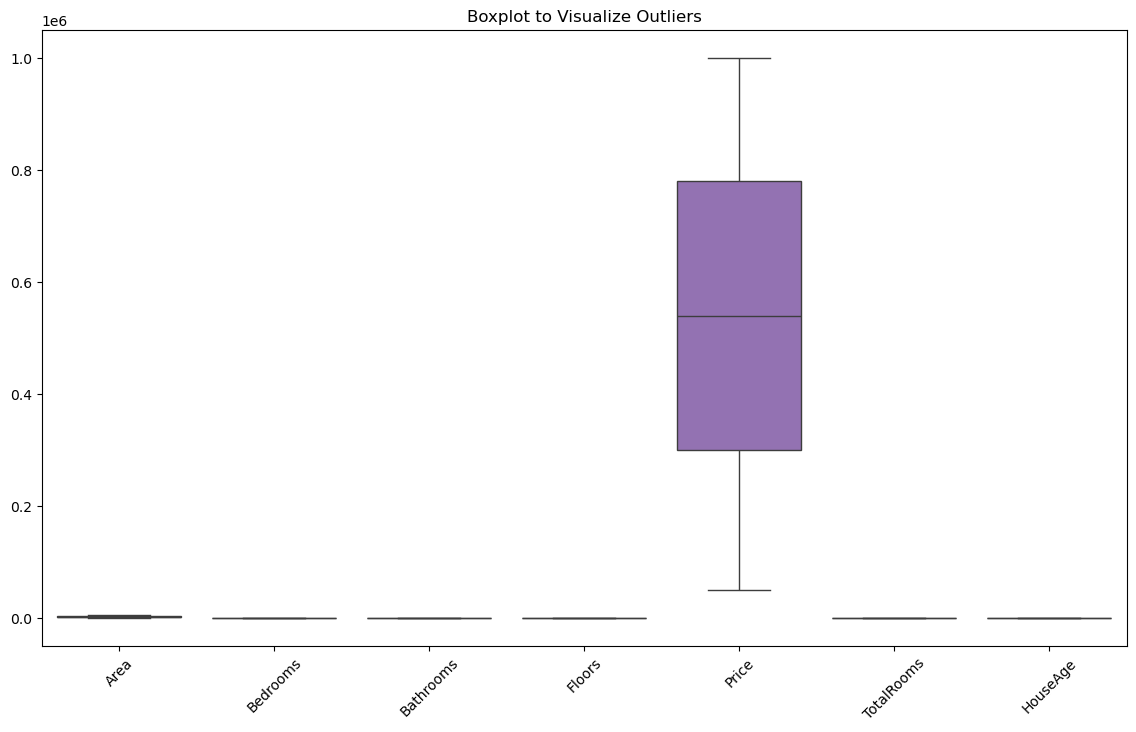

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Price', 'TotalRooms', 'HouseAge']])
plt.title("Boxplot to Visualize Outliers")
plt.xticks(rotation=45)
plt.show()

# Detect Outliers with IQR Method

In [28]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply to Area and Price
df = remove_outliers_iqr(df, 'Area')
df = remove_outliers_iqr(df, 'Price')


In [29]:
print("After removing outliers, dataset shape:", df.shape)

After removing outliers, dataset shape: (2000, 22)


 # Split features and target

In [30]:
X = df.drop(columns=['Id', 'Price', 'LogPrice'])
y = df['LogPrice']

In [32]:
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Area_per_Bedroom,Bathroom_per_Floor,TotalRooms,HouseAge,AgeCategory_Modern,AgeCategory_Old,AgeCategory_Historic,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor
0,1360,5,4,3,1970,0,272.0,1.333333,9,55,0,1,0,0,0,0,0,0,0
1,4272,5,4,3,1958,0,854.4,1.333333,9,67,0,1,0,0,0,0,0,0,0
2,3592,2,2,3,1938,0,1796.0,0.666667,4,87,0,1,0,0,0,0,0,1,0
3,966,4,2,2,1902,1,241.5,1.000000,6,123,0,0,1,0,1,0,1,0,0
4,4926,1,4,2,1975,1,4926.0,2.000000,5,50,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,998.8,1.333333,9,102,0,0,1,0,1,0,0,0,1
1996,3046,5,2,1,2019,1,609.2,2.000000,7,6,0,0,0,0,1,0,0,0,1
1997,1062,5,1,2,1903,0,212.4,0.500000,6,122,0,0,1,1,0,0,0,0,1
1998,4062,3,1,2,1936,1,1354.0,0.500000,4,89,0,1,0,0,0,1,0,0,0


In [33]:
y

0       11.917850
1       12.959840
2       12.494052
3       12.405005
4       13.363042
          ...    
1995    12.596830
1996    13.272384
1997    13.075115
1998    11.989899
1999    13.086788
Name: LogPrice, Length: 2000, dtype: float64

# Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 19)
(400, 19)
(1600,)
(400,)


# 🌲 What is **Random Forest**?

✅ **Random Forest** is an ensemble machine learning algorithm that builds **many decision trees**, and then combines their predictions to make a **stronger, more accurate** prediction.

---

## 🎯 Think of it like this:

> Imagine 100 different students (trees) are solving the same problem (predicting price). Each gives their answer, and the final prediction is the **average** of all their answers.

* ✅ This removes bias from a single bad decision tree
* ✅ It also reduces overfitting

---

# 🧠 How Random Forest Works (Step-by-Step)

| Step | What Happens                                                  |
| ---- | ------------------------------------------------------------- |
| 1.   | It builds **multiple decision trees** (e.g., 100 trees)       |
| 2.   | Each tree is trained on a **random subset** of the data       |
| 3.   | At each split, it picks a **random subset of features**       |
| 4.   | Each tree makes a prediction                                  |
| 5.   | The **average** of all trees’ predictions is the final result |

> This randomness makes the model **robust, less overfit**, and more **generalizable**.

---

# 🔢 What is `n_estimators`?

* It tells Random Forest how many **trees** to build.
* Default is usually `100`.
* More trees → better accuracy, but slower training.

| `n_estimators` | What it means                            |
| -------------- | ---------------------------------------- |
| `10`           | Small forest (fast, but less accurate)   |
| `100`          | Balanced (good default)                  |
| `300+`         | More stable predictions, slower training |

---

# 📌 Summary

| Concept           | Explanation                                                    |
| ----------------- | -------------------------------------------------------------- |
| **Random Forest** | Many decision trees voting together                            |
| **n\_estimators** | Number of trees in the forest                                  |
| **Good For**      | Regression and classification problems                         |
| **Key Strength**  | Handles non-linear data, avoids overfitting, no scaling needed |

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on training set
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predict 

In [39]:
y_pred = rf.predict(X_test)

In [41]:
print(y_pred[0:10])

[13.1952036  12.81938048 12.65941166 13.24503899 13.05888363 13.1735271
 13.01608998 13.13567792 13.36881788 13.37813793]


In [42]:
print(y_test[0:10])

1860    13.151464
353     13.450596
1333    11.103076
905     13.385101
1289    12.316204
1273    13.056495
938     13.148035
1731    13.722874
65      13.491531
1323    12.734982
Name: LogPrice, dtype: float64


In [43]:
# Convert predictions back to original price scale
y_pred_real = np.exp(y_pred)
y_test_real = np.exp(y_test)

In [44]:
print(y_pred_real[0:10])
print(y_test_real[0:10])

[537779.33587953 369305.86300525 314711.51229529 565258.81858639
 469246.56454184 526247.60021363 449589.3926549  506701.78772497
 639740.48558883 645730.7699277 ]
1860    514764.0
353     694256.0
1333     66375.0
905     650243.0
1289    223285.0
1273    468127.0
938     513002.0
1731    911525.0
65      723265.0
1323    339416.0
Name: LogPrice, dtype: float64


# Evaluate

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

In [47]:
print("MAE:", mae)
print("R² Score:", r2)

MAE: 273592.42228035326
R² Score: -0.30356948736843736


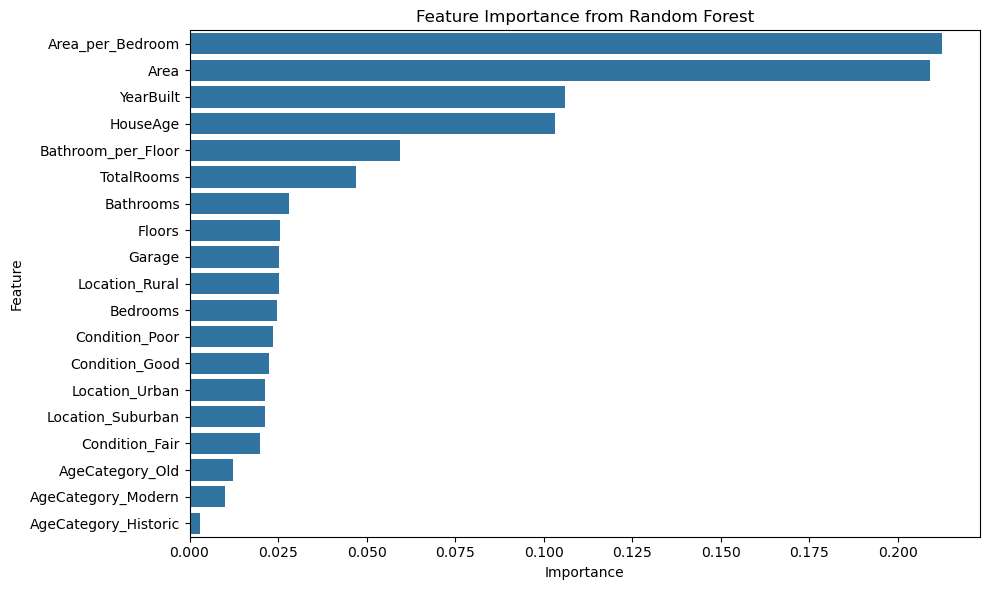

In [48]:
import matplotlib.pyplot as plt

# Get importance
importances = rf.feature_importances_

# Create DataFrame
feat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


In [49]:
# Get feature importances and print in sorted order
importances = rf.feature_importances_
features = X_train.columns

# Combine into list of tuples
feat_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

# Print in readable format
for feature, score in feat_importance:
    print(f"{feature:25s}: {score:.4f}")


Area_per_Bedroom         : 0.2126
Area                     : 0.2091
YearBuilt                : 0.1061
HouseAge                 : 0.1033
Bathroom_per_Floor       : 0.0595
TotalRooms               : 0.0469
Bathrooms                : 0.0281
Floors                   : 0.0256
Garage                   : 0.0252
Location_Rural           : 0.0252
Bedrooms                 : 0.0247
Condition_Poor           : 0.0237
Condition_Good           : 0.0226
Location_Urban           : 0.0214
Location_Suburban        : 0.0212
Condition_Fair           : 0.0198
AgeCategory_Old          : 0.0123
AgeCategory_Modern       : 0.0099
AgeCategory_Historic     : 0.0029


# Drop Low-Impact Features

In [50]:
drop_cols = [
    'AgeCategory_Old', 'AgeCategory_Modern', 'AgeCategory_Historic',
    'Location_Rural', 'Location_Urban', 'Location_Suburban',
    'Condition_Good', 'Condition_Fair', 'Condition_Poor'
]

In [51]:
df[['Area', 'Area_per_Bedroom']].corr()

,Area,Area_per_Bedroom
Area,1.000000,0.532922
Area_per_Bedroom,0.532922,1.000000


 Interpretation:
Correlation = 0.53 → Moderate positive correlation

Not too high (like >0.9), so both features bring some unique information

✅ Conclusion: Keep both for now. The model finds both useful (see importance scores).

In [53]:
df.head(3)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price,LogPrice,Area_per_Bedroom,...,HouseAge,AgeCategory_Modern,AgeCategory_Old,AgeCategory_Historic,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor
0,1,1360,5,4,3,1970,0,149919,11.917850,272.0,...,55,0,1,0,0,0,0,0,0,0
1,2,4272,5,4,3,1958,0,424998,12.959840,854.4,...,67,0,1,0,0,0,0,0,0,0
2,3,3592,2,2,3,1938,0,266746,12.494052,1796.0,...,87,0,1,0,0,0,0,0,1,0


# Updated Feature Set

In [54]:
X = df.drop(columns=[
    'Id', 'Price', 'LogPrice',
    'AgeCategory_Modern', 'AgeCategory_Old', 'AgeCategory_Historic',
    'Condition_Fair'
])
y = df['LogPrice']

In [55]:
# Split again (after drop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_pred_real = np.exp(y_pred)
y_test_real = np.exp(y_test)

# Evaluate
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print("MAE:", mae)
print("R² Score:", r2)

MAE: 274039.8985146919
R² Score: -0.3121741237747062


# **Hyperparameter Tuning & RandomizedSearchCV — Summary**

### What is Hyperparameter Tuning?

* Hyperparameters are settings you choose **before training** a machine learning model (e.g., number of trees in Random Forest, max depth).
* Tuning means **searching for the best hyperparameter values** to improve model accuracy and generalization.
* Proper tuning helps avoid underfitting and overfitting.

### Why is Hyperparameter Tuning Useful?

* Default settings rarely give the best results.
* Tuning can significantly boost model performance.
* Helps tailor the model to your specific dataset.

### How Does Hyperparameter Tuning Work?

* Try many combinations of hyperparameters.
* For each combination, train and validate the model.
* Select the combination with the best validation metric (like MAE or R²).

### What is RandomizedSearchCV?

* A tool from scikit-learn to automate hyperparameter tuning.
* Instead of trying **all** parameter combinations (which can be huge), it samples a fixed number of **random** combinations.
* Faster than exhaustive search and often finds good results.
* Uses cross-validation to evaluate each combination.
* Returns the best hyperparameter set found.

### How Does RandomizedSearchCV Work?

* You provide:

  * The model to tune.
  * A search space of hyperparameter values.
  * Number of random samples to try.
  * Scoring metric.
* It tries random combinations, evaluates each, and picks the best.

### What Comes First: Tuning or RandomizedSearchCV?

* Hyperparameter tuning is the **process**.
* RandomizedSearchCV is a **method/tool** to perform that process efficiently.

# RandomizedSearchCV

In [56]:
from sklearn.model_selection import RandomizedSearchCV


In [57]:
# 3. Create hyperparameter search space

param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [58]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled
    scoring='neg_mean_absolute_error',  # Metric to optimize (negative MAE)
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

In [59]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\satha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\satha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satha\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\satha\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\satha\anaconda3\Lib\site-packages\sk

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [60]:
print("Best Parameters:", random_search.best_params_)
print("Best MAE (negative):", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 50}
Best MAE (negative): -0.5708128360389461


In [61]:

# Step 7: Evaluate on test set
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_pred_real = np.exp(y_pred)
y_test_real = np.exp(y_test)

from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print("Test MAE:", mae)
print("Test R² Score:", r2)

Test MAE: 264447.62316987856
Test R² Score: -0.19069662592796566
